# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Ritesh Kumar

ID: 1001722622

NetID: rxk2622

## Rules

1. Work is to be done individually.
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.

## Assignment Details

The purpose of this assignment is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Drug consumption". You can find more information here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.

You need to submit this ipython file after renaming it. 


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [22]:
#########################begin code for Task 1-a
# Loading Dataset
dataset1 = pd.read_csv('drug_consumption.csv',header=None)
dataset1.columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']

dataset1= dataset1[['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Amphet','Amyl','Benzos','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Semer','VSA']]
#Seperating features and classes
array = dataset1.values
X = array[:,0:13]
Y = array[:,13:]

DrugClass = []
def checkDrug(y):
    if(np.any("CL2" == y) or np.any("CL3" == y) or np.any("CL4" == y) or np.any("CL5" == y) or np.any("CL6" == y)):  
        DrugClass.append("1")
    else:
        DrugClass.append("0")
        
np.apply_along_axis(checkDrug,axis=1,arr=Y)
dataset1 = dataset1.iloc[:,0:13]
dataset1["DrugUser"]=DrugClass
dataset1.drop(dataset1.columns[0],axis=1,inplace=True)
dataset1.to_csv('drug_user.csv',index=False)
dataset = pd.read_csv('drug_user.csv')
dataset.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,DrugUser
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1


Error = [2.95, 2.66, 2.53, 2.45, 2.39, 2.34, 2.3, 2.27, 2.24, 2.21]


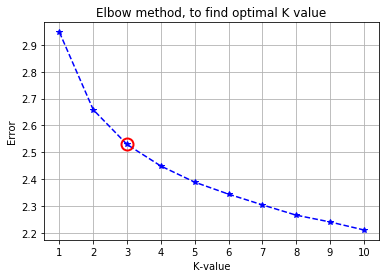

In [4]:
SSE = []
dataset_X = dataset[dataset.columns[:-1]] #Remove drug user class
for k in range(1,11):
    kMeans = KMeans(n_clusters=k).fit(dataset_X)
    SSE.append(sum(np.min(cdist(dataset_X,kMeans.cluster_centers_,'euclidean'),axis=1))/dataset_X.shape[0])
print("Error = {}".format([round(sse,2) for sse in SSE]))

# Plot the elbow
plt.plot(range(1,11), SSE, '--b*')
plt.xticks(range(1,11))
plt.xlabel('K-value')
plt.ylabel('Error')
plt.title('Elbow method, to find optimal K value')
plt.plot(3, SSE[2], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid('True')
plt.show()

#########################end code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [5]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
### Created training and testing datasets will be used for the rest of this assignment except Task 3.
X = dataset[dataset.columns[:-1]]
Class = dataset[dataset.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Class, test_size=0.30, shuffle=True)
###################end code for Task 1-b-1

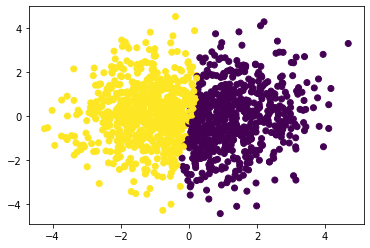

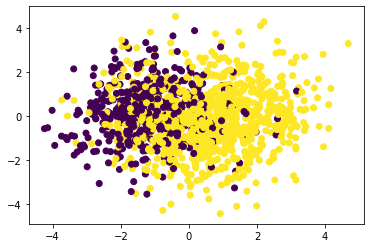

In [6]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
train_Kmeans = KMeans(n_clusters=2,random_state=0)

# Compute cluster centers and predict cluster index for each sample 
X_Train_kmeans = train_Kmeans.fit_predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

plt.scatter(x,y,c=X_Train_kmeans)
plt.show()

plt.scatter(x,y,c=Y_train)
plt.show()
###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

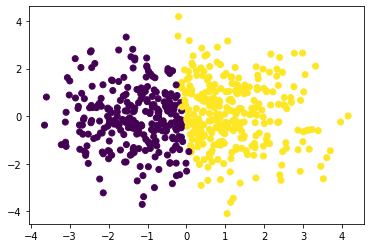

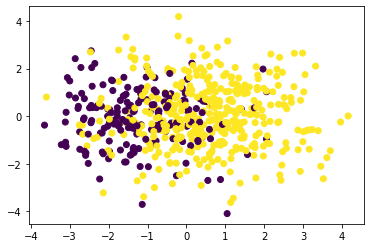

In [7]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)
X_Test_kmeans = train_Kmeans.fit_predict(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.scatter(x,y,c=X_Test_kmeans)
plt.show()

plt.scatter(x,y,c=Y_test)
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [8]:
###################begin code for Task 1-b-4: Print out a confusion matrix
kmean_conf = confusion_matrix(Y_test,X_Test_kmeans)
# print("Confusion Matrix :\n")
# print(" \t{}\t{}".format("FALSE","TRUE"))
print("Confusion Matrix :\n {}\n".format(kmean_conf))
# print("FALSE\t{}\t{}".format(kmeans_conf[0][0],kmeans_conf[0][1]))
# print("TRUE\t{}\t{}".format(kmeans_conf[1][0],kmeans_conf[1][1]))
###################end code for Task 1-b-4

Confusion Matrix :
 [[144  34]
 [125 263]]



# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [9]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
cosine_dist = pairwise_distances(X_train,metric='cosine')
euclidean_dist = pairwise_distances(X_train,metric='euclidean')
manhattan_dist = pairwise_distances(X_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cosine_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_dist)
f1_cosine_comp = f1_score(Y_train,cosine_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euclidean_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_dist)
f1_euclidean_comp = f1_score(Y_train,euclidean_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
manhattan_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_dist)
f1_manhattan_comp = f1_score(Y_train,manhattan_comp)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cosine_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_dist)
f1_cosine_avg = f1_score(Y_train,cosine_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean

euclidean_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_dist)
f1_euclidean_avg = f1_score(Y_train,euclidean_avg)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
manhattan_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_dist)
f1_manhattan_avg = f1_score(Y_train,manhattan_avg)

print("F1-score for complete linkage + cosine", f1_cosine_comp)
print("F1-score for complete linkage + euclidean", f1_euclidean_comp)
print("F1-score for complete linkage + manhattan", f1_manhattan_comp)
print("F1-score for average linkage + cosine", f1_cosine_avg)
print("F1-score for average linkage + euclidean", f1_euclidean_avg)
print("F1-score for average linkage + manhattan", f1_manhattan_avg)

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.40226272784412315
F1-score for complete linkage + euclidean 0.47072879330943845
F1-score for complete linkage + manhattan 0.30713245997088795
F1-score for average linkage + cosine 0.3654223968565815
F1-score for average linkage + euclidean 0.002259887005649717
F1-score for average linkage + manhattan 0.0022675736961451248


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

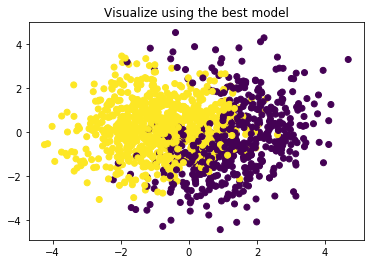

In [10]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels 
models = {'cosine_comp':f1_cosine_comp,'euclidean_comp':f1_euclidean_comp,'manhattan_comp':f1_manhattan_comp,'cosine_avg':f1_cosine_avg,'euclidean_avg':f1_euclidean_avg,'manhattan_avg':f1_manhattan_avg}
best_model_val = max(models,key=models.get)

if best_model_val == 'cosine_comp':
    best_model = cosine_comp

elif best_model_val == 'euclidean_comp':
    best_model = euclidean_comp

elif best_model_val == 'manhattan_comp':
    best_model = manhattan_comp

elif best_model_val == 'cosine_avg':
    best_model = cosine_avg

elif best_model_val == 'euclidean_avg':
    best_model = euclidean_avg

elif best_model_val == 'manhattan_avg':
    best_model = manhattan_avg

else:
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 

x = X_train_pca[:,0]
y = X_train_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("Visualize using the best model")
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

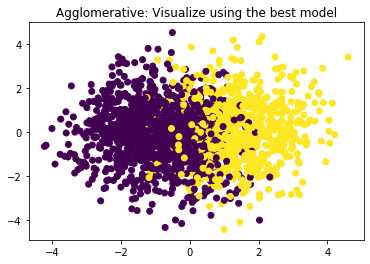

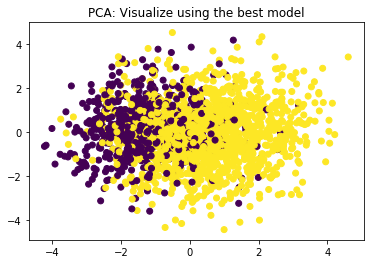

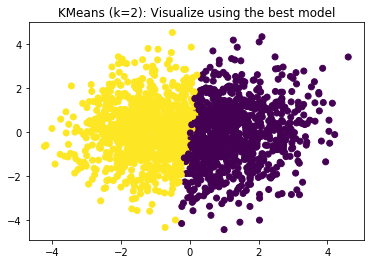

In [12]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

dataset_Kmeans = KMeans(n_clusters=2,random_state=0)
datset_Kmeans_fit = dataset_Kmeans.fit_predict(dataset_X)


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
cosine_dist = pairwise_distances(dataset_X,metric='cosine')
euclidean_dist = pairwise_distances(dataset_X,metric='euclidean')
manhattan_dist = pairwise_distances(dataset_X,metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
cosine_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_dist)
f1_cosine_comp = f1_score(Class,cosine_comp)

euclidean_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_dist)
f1_euclidean_comp = f1_score(Class,euclidean_comp)

manhattan_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_dist)
f1_manhattan_comp = f1_score(Class,manhattan_comp)

cosine_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_dist)
f1_cosine_avg = f1_score(Class,cosine_avg)

euclidean_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_dist)
f1_euc_avg = f1_score(Class,euclidean_avg)

manhattan_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_dist)
f1_manhattan_avg = f1_score(Class,manhattan_avg)



models = {'cos_comp':f1_cosine_comp,'euc_comp':f1_euclidean_comp,'man_comp':f1_manhattan_comp,'cos_avg':f1_cosine_avg,'euc_avg':f1_euclidean_avg,'man_avg':f1_manhattan_avg}
best_model_val = max(models,key=models.get)

if best_model_val == 'cos_comp':
    best_model = cosine_comp

elif best_model_val == 'euc_comp':
    best_model = euclidean_comp

elif best_model_val == 'man_comp':
    best_model = manhattan_comp

elif best_model_val == 'cos_avg':
    best_model = cosine_avg

elif best_model_val == 'euc_avg':
    best_model = euclidean_avg

elif best_model_val == 'man_avg':
    best_model = manhattan_avg

else:
    best_model = None

X_pca =  PCA(n_components=2).fit_transform(dataset_X)   

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("Agglomerative: Visualize using the best model")
plt.show()

### Visualize Clusters
#  Model and fit the data to the PCA model
x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y,c=Class)
plt.title("PCA: Visualize using the best model")
plt.show()

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y,c=datset_Kmeans_fit)
plt.title("KMeans (k=2): Visualize using the best model")
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [15]:
###################begin code for Task 3-b
print("1. Confusion matrix\n")
kmean_conf = confusion_matrix(Class,datset_Kmeans_fit)
aglo_conf = confusion_matrix(Class,best_model)
print("Kmeans Clustering: \n{}\n\n\nAglomerative Clustering:\n{}\n\n\n".format(kmean_conf,aglo_conf))

print("2. Precision\n")
kmean_prec = precision_score(Class,datset_Kmeans_fit)
aglo_prec = precision_score(Class,best_model)
print("Kmeans Clustering: \n{}\n\n\nAglomerative Clustering:\n{}\n\n\n".format(kmean_prec,aglo_prec))


print("3. F1 Score\n")
kmean_score = f1_score(Class,datset_Kmeans_fit)
aglo_score = f1_score(Class,best_model)
print("Kmeans Clustering: \n{}\n\n\nAglomerative Clustering:\n{}\n\n\n".format(kmean_score,aglo_score))

print("4. Recall\n")
kmean_recall = recall_score(Class,datset_Kmeans_fit)
aglo_recall = recall_score(Class,best_model)
print("Kmeans Clustering: \n{}\n\n\nAglomerative Clustering:\n{}\n\n\n".format(kmean_recall,aglo_recall))

print("Reason: Aglomerative Clustering is better than KMeans Clustering as its F1 Score is better.\nF1 is an overall measure of a model’s accuracy that combines precision and recall.\n A good F1 score means that you have low false positives and low false negatives, overall giving better clustering model. ")

###################end code for Task 3-b

1. Confusion matrix

Kmeans Clustering: 
[[ 87 529]
 [843 426]]


Aglomerative Clustering:
[[574  42]
 [619 650]]



2. Precision

Kmeans Clustering: 
0.44607329842931936


Aglomerative Clustering:
0.9393063583815029



3. F1 Score

Kmeans Clustering: 
0.3830935251798561


Aglomerative Clustering:
0.6629270780214176



4. Recall

Kmeans Clustering: 
0.33569739952718675


Aglomerative Clustering:
0.512214342001576



Reason: Aglomerative Clustering is better than KMeans Clustering as its F1 Score is better.
F1 is an overall measure of a model’s accuracy that combines precision and recall.
 A good F1 score means that you have low false positives and low false negatives, overall giving better clustering model. 


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points